# Support Vector Classifier
## SVM Kernels Indepth Implementation -

- if let's say we are using a Linear SVC & if my data points are clearly separable then only we get good accuracy
- kernel used for Linear SVC - "rbf"


What happen if the dataset has overlapping and non-linear data points ?
- in this case we can directly create a best fit line bcz 50% data points might be correctly classified & 50% might not be.
- Hence we can use SVM Kernels 
- or increase the number of dimensions with respect to the features

# Create dataset using numpy

In [118]:
!pip3 install plotly



Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [119]:
import numpy as np
import matplotlib.pyplot as plt

# outer co-ordinates 
# x range = -5 to +5 and total records in x = 100
x = np.linspace(-5.0, 5.0, 100)
y = np.sqrt(10**2 - x**2)
y = np.hstack([y,-y])
x = np.hstack([x, -x])

In [120]:
# inner co-ordinates
x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)
y1 = np.hstack([y1,-y1])
x1 = np.hstack([x1, -x1])

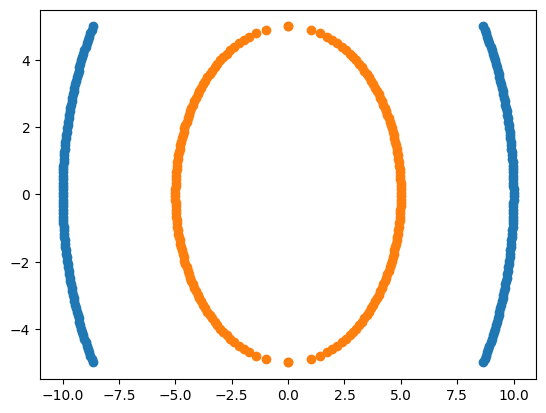

In [121]:
plt.scatter(y,x)
plt.scatter(y1, x1)

# with respect to outer output data points label it as 0 and for inner data points label it as 1

- np.vstack([y, x]): 
    This takes your data arrays (y and x) and vertically stacks them into a single NumPy array (one array on top of the other). The result is likely an array with 2 rows and many columns.
- .T:
     This transposes the stacked array (flips the rows and columns). This is necessary because data usually needs features as columns and samples as rows to work correctly with Pandas.
- pd.DataFrame(...): 
    This converts the resulting transposed NumPy array into a Pandas DataFrame object.
- columns=['X1', 'X2']: 
    This assigns the names 'X1' and 'X2' to the two columns of the newly created DataFrame.
- df1['Y'] = 0: 
    This creates a new column named 'Y' in the df1 DataFrame and assigns the value 0 to every single row in that column. This acts as a classification label (e.g., "Class 0") for all data points originating from your first dataset (x, y).
- ignore_index=True: 
    When combining data, the original index numbers from df1 (e.g., 0 through 49) and df2 (e.g., 0 through 49) would normally overlap. This parameter tells Pandas to ignore those original indexes and create a continuous, fresh index for the final combined df (e.g., 0 through 99).

The columns 'X1' and 'X2' hold the input features from your original data arrays (x and x1).


In [122]:

import pandas as pd

# create the dataframe, verticaly stack the y over x and transpose the ndarray
df1 = pd.DataFrame(np.vstack([y,x]).T,columns=['X1', 'X2'])
# Add a classification label to df1
df1['Y'] = 0
df2 = pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1', 'X2'])
df2['Y'] = 1
df = pd.concat([df1, df2], ignore_index=True)
df.head(5)

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [123]:
df.tail(5)

,X1,X2,Y
395,-1.969049,-4.59596,1
396,-1.714198,-4.69697,1
397,-1.406908,-4.79798,1
398,-0.999949,-4.89899,1
399,-0.000000,-5.00000,1


# Separating the independent & dependent features

In [124]:
X = df.iloc[:, :2]
y = df.Y

In [125]:
# y as output features with binary classes 0  & 1
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: Y, Length: 400, dtype: int64

# Train Test Split

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [127]:
# refer to polynomial kernel svm wikipedia page for the tranpose and x and y vector computation formula.
# finding the components for polynomial kernel

df['X1 Square'] = df['X1']**2
df['X2 Square'] = df['X2']**2
df['X1*X2'] = (df['X1'] * df['X2'])
df.head()


,X1,X2,Y,X1 Square,X2 Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [128]:
# separate the indepent & dependent features from the dataframe
feature_columns = ['X1', 'X2', 'X1 Square', 'X2 Square', 'X1*X2']
X = df[feature_columns]
y = df['Y']

In [129]:
X

,X1,X2,X1 Square,X2 Square,X1*X2
0,8.660254,-5.00000,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,78.877155,21.122845,-40.818009
...,...,...,...,...,...
395,-1.969049,-4.59596,3.877155,21.122845,9.049671
396,-1.714198,-4.69697,2.938476,22.061524,8.051537
397,-1.406908,-4.79798,1.979390,23.020610,6.750316
398,-0.999949,-4.89899,0.999898,24.000102,4.898740


In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [131]:
X_train

,X1,X2,X1 Square,X2 Square,X1*X2
250,4.999745,0.050505,24.997449,0.002551,0.252512
63,9.906589,1.363636,98.140496,1.859504,13.508984
312,-3.263736,3.787879,10.651974,14.348026,-12.362637
159,-9.953852,-0.959596,99.079176,0.920824,9.551676
283,3.680983,3.383838,13.549638,11.450362,12.455852
...,...,...,...,...,...
323,-4.223140,2.676768,17.834915,7.165085,-11.304366
192,-9.031653,-4.292929,81.570758,18.429242,38.772248
117,-9.445795,3.282828,89.223038,10.776962,-31.008922
47,9.996811,-0.252525,99.936231,0.063769,-2.524447


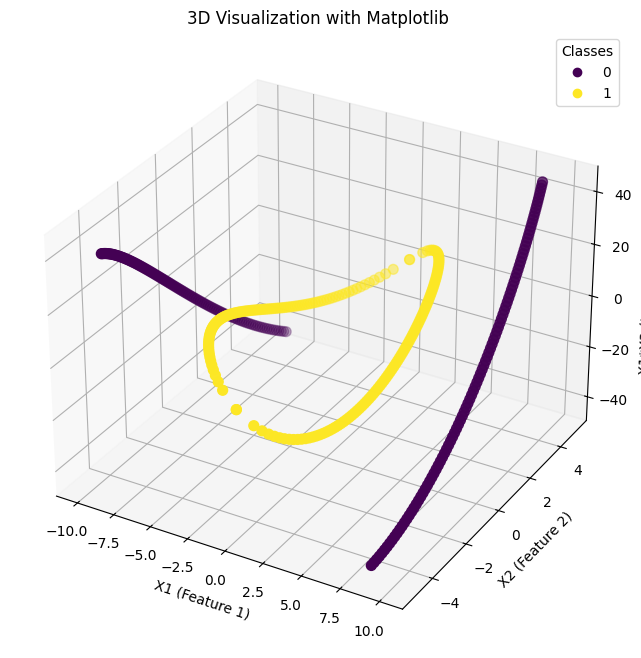

In [132]:
from mpl_toolkits.mplot3d import Axes3D
# Ensure the interaction term column exists if you haven't run previous code
if 'X1*X2' not in df.columns:
    df['X1*X2'] = df['X1'] * df['X2']

# --- Plotting Code ---

# 1. Create a figure and a 3D axes object
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d') # Key step: define a 3D projection

# 2. Define the data for plotting
x_data = df['X1']
y_data = df['X2']
z_data = df['X1*X2']
colors = df['Y'] # Use the 'Y' column for coloring
# 3. Plot the data
# The 'c' parameter takes the 'Y' values and colors points based on those values (0 or 1)
scatter = ax.scatter(x_data, y_data, z_data, c=colors, cmap='viridis', s=50)

# 4. Set labels and title
ax.set_xlabel('X1 (Feature 1)')
ax.set_ylabel('X2 (Feature 2)')
ax.set_zlabel('X1*X2 (Interaction Term)')
ax.set_title("3D Visualization with Matplotlib")

# Optional: Add a color bar to explain the colors (Class 0 and Class 1)
legend = ax.legend(*scatter.legend_elements(), title="Classes")

# 5. Display the plot
plt.show()


Now the points in scatter 3d plot are separated - no overlap of points - we can't create a best fit line .

- We can now create a Hyperplane on this 3d graph.

## To do a preiction on this transformed data -

- we create a hyperplane 
- we use an SVC Kernel with kernel type = "linear" & do the prediction.


In [133]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel = "linear")

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_pred, y_test)


1.0

Here in the above accuracy metrics score is 1.0 - 
now -
- if the classifier = SVC(kernel = "poly")
if the kernel would be polynomial kernel instead of linear the accuracy would still be 1.

This happens beacuse polynomial kernel internlly creates this extra feature x1^2, x2^2, x1*x2 that we manually created in linear kernel.

If we manually create this extra feature x1^2, x2^2, x1*x2 - we can use the linear kernel as data points are separable now.


- same for rbf & sigmoid kernel.

In this case all of our kernel accuracy is - 1.0 that is a 100% accuracy rate.

We play around with different hyperparameters and kernels & check with gives highest accuracy.

In [134]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel = "rbf")

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_pred, y_test)

1.0

In [135]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel = "sigmoid")

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_pred, y_test)

1.0